In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf

In [51]:
df = pd.read_csv('/content/The_ Chronicles_of_the_Green_Guardians.csv')


In [52]:
print(df.head())

         Date         City      County State Population Staying at Home  \
0  2019-01-01  albuquerque  bernalillo    NM                   1,77,171   
1  2019-01-01      atlanta      fulton    GA                   2,83,093   
2  2019-01-01       austin      travis    TX                   2,68,732   
3  2019-01-01    baltimore     baltimo    MD                   1,91,486   
4  2019-01-01        boise         ada    ID                   1,05,237   

  Population Not Staying at Home  mil_miles  past_week_avg_miles   latitude  \
0                       4,99,456  19.038463                  0.0  35.107209   
1                       7,63,811  29.295609                  0.0  33.760109   
2                       9,76,194  27.286079                  0.0  30.283333   
3                       4,09,167  12.961132                  0.0  39.305833   
4                       3,63,293  12.640954                  0.0  43.604545   

    longitude  ...  pm10_max  pm10_median  pm10_variance  pm10_count  \
0 

In [53]:
df.dropna()

,Date,City,County,State,Population Staying at Home,Population Not Staying at Home,mil_miles,past_week_avg_miles,latitude,longitude,...,pm10_max,pm10_median,pm10_variance,pm10_count,wind-gust_min,wind-gust_max,wind-gust_median,wind-gust_variance,wind-gust_count,pp_feat
22,2019-01-01,jacksonville,duval,FL,"2,10,989","7,36,288",25.409460,0.0,30.316154,-81.644231,...,51.0,18.0,1532.82,96.0,0.1,13.0,1.8,86.61,88.0,2.572690
36,2019-01-01,phoenix,maricopa,AZ,"10,25,429","33,71,913",130.135000,0.0,33.502593,-112.070988,...,90.0,12.0,2670.76,216.0,0.1,9.0,2.1,42.24,170.0,2.782755
53,2019-01-01,tucson,pima,AZ,"2,46,669","7,89,228",28.393075,0.0,32.217037,-110.949815,...,15.0,4.0,85.93,178.0,0.1,14.5,4.5,104.11,176.0,0.890146
77,2019-01-02,las vegas,clark,NV,"4,35,437","17,89,389",71.470204,0.0,36.135584,-115.191039,...,60.0,19.0,1482.93,168.0,0.2,11.6,3.7,68.94,168.0,0.840039
93,2019-01-02,raleigh,wake,NC,"1,83,807","9,05,159",39.342875,0.0,35.821591,-78.650455,...,21.0,17.0,43.41,24.0,0.1,11.0,1.7,117.93,59.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35563,2020-12-11,indianapolis,marion,IN,"2,86,006","6,68,664",31.252612,0.0,39.786667,-86.140333,...,85.0,22.0,3207.37,24.0,0.1,9.0,3.0,61.62,56.0,0.390360
35564,2020-12-11,jackson,hinds,MS,"57,308","1,79,777",6.476825,0.0,32.318214,-90.198571,...,41.0,16.0,665.19,47.0,0.3,4.2,2.5,11.77,16.0,1.707665
35566,2020-12-11,las vegas,clark,NV,"7,03,017","15,28,630",52.560952,0.0,36.135584,-115.191039,...,79.0,27.0,2512.48,184.0,0.2,10.0,2.6,69.07,125.0,0.505200
35568,2020-12-11,los angeles,los angeles,CA,"32,44,229","68,61,289",246.127087,0.0,34.037083,-118.288438,...,51.0,34.0,668.04,24.0,0.3,8.0,2.0,72.40,15.0,6.239163


In [54]:
df['Population Staying at Home'] = df['Population Staying at Home'].str.replace(',', '').astype(float)
df['Population Not Staying at Home'] = df['Population Not Staying at Home'].str.replace(',', '').astype(float)


In [55]:
print(df.columns)


Index(['Date', 'City', 'County', 'State', 'Population Staying at Home',
       'Population Not Staying at Home', 'mil_miles', 'past_week_avg_miles',
       'latitude', 'longitude', 'o3_min', 'o3_max', 'o3_median', 'o3_variance',
       'o3_count', 'pressure_min', 'pressure_max', 'pressure_median',
       'pressure_variance', 'pressure_count', 'pm25_min', 'pm25_max',
       'pm25_median', 'pm25_variance', 'pm25_count', 'humidity_min',
       'humidity_max', 'humidity_median', 'humidity_variance',
       'humidity_count', 'temperature_min', 'temperature_max',
       'temperature_median', 'temperature_variance', 'temperature_count',
       'dew_min', 'dew_max', 'dew_median', 'dew_variance', 'dew_count',
       'no2_min', 'no2_max', 'no2_median', 'no2_variance', 'no2_count',
       'wind-speed_min', 'wind-speed_max', 'wind-speed_median',
       'wind-speed_variance', 'wind-speed_count', 'co_min', 'co_max',
       'co_median', 'co_variance', 'co_count', 'so2_min', 'so2_max',
       'so2_med

In [57]:
df = pd.get_dummies(df, columns=['City', 'County', 'State'])

In [58]:
y = df['pm10_max']
X = df.drop(columns=['pm10_max', 'Date'])

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [61]:
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [62]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [63]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=2, shuffle=False)

Epoch 1/50
890/890 - 4s - loss: nan - val_loss: nan - 4s/epoch - 5ms/step
Epoch 2/50
890/890 - 2s - loss: nan - val_loss: nan - 2s/epoch - 2ms/step
Epoch 3/50
890/890 - 3s - loss: nan - val_loss: nan - 3s/epoch - 3ms/step
Epoch 4/50
890/890 - 2s - loss: nan - val_loss: nan - 2s/epoch - 2ms/step
Epoch 5/50
890/890 - 2s - loss: nan - val_loss: nan - 2s/epoch - 2ms/step
Epoch 6/50
890/890 - 2s - loss: nan - val_loss: nan - 2s/epoch - 2ms/step
Epoch 7/50
890/890 - 2s - loss: nan - val_loss: nan - 2s/epoch - 2ms/step
Epoch 8/50
890/890 - 2s - loss: nan - val_loss: nan - 2s/epoch - 2ms/step
Epoch 9/50
890/890 - 2s - loss: nan - val_loss: nan - 2s/epoch - 2ms/step
Epoch 10/50
890/890 - 2s - loss: nan - val_loss: nan - 2s/epoch - 3ms/step
Epoch 11/50
890/890 - 2s - loss: nan - val_loss: nan - 2s/epoch - 2ms/step
Epoch 12/50
890/890 - 2s - loss: nan - val_loss: nan - 2s/epoch - 2ms/step
Epoch 13/50
890/890 - 2s - loss: nan - val_loss: nan - 2s/epoch - 2ms/step
Epoch 14/50
890/890 - 2s - loss: n

In [64]:
y_pred = model.predict(X_test_scaled)

223/223 [==============================] - 0s 1ms/step


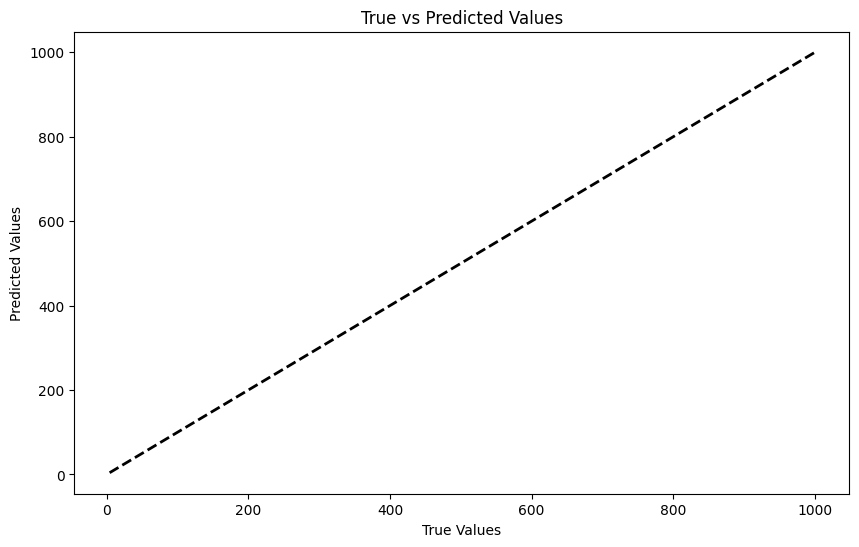

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

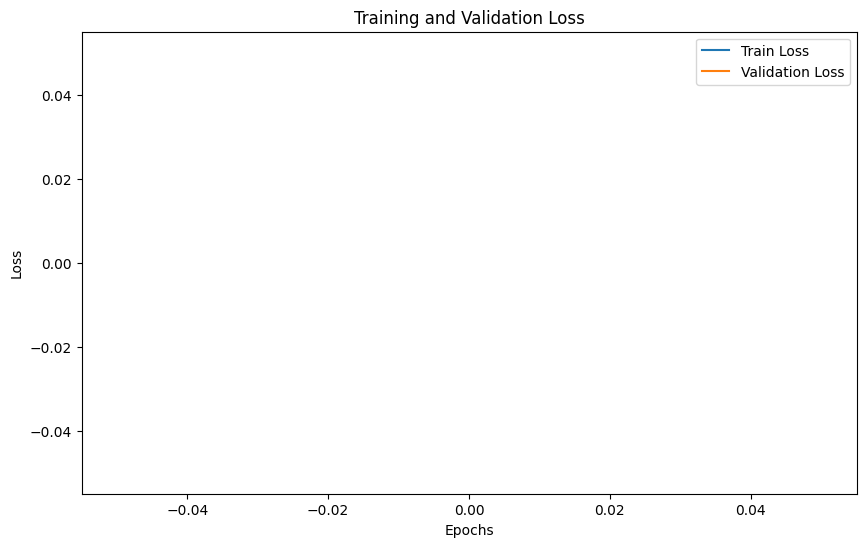

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [69]:
df.describe

<bound method NDFrame.describe of              Date  Population Staying at Home  Population Not Staying at Home  \
0      2019-01-01                    177171.0                        499456.0   
1      2019-01-01                    283093.0                        763811.0   
2      2019-01-01                    268732.0                        976194.0   
3      2019-01-01                    191486.0                        409167.0   
4      2019-01-01                    105237.0                        363293.0   
...           ...                         ...                             ...   
35591  2020-12-11                    733494.0                       1499669.0   
35592  2020-12-11                     60167.0                        135181.0   
35593  2020-12-11                    159253.0                        316926.0   
35594  2020-12-11                     76894.0                        215608.0   
35595  2020-12-11                    317121.0                        721952.0   

       mil_miles  past_week_avg_miles   latitude   longitude  o3_min  o3_max  \
0      19.038463                  0.0  35.107209 -106.617209    10.4    26.4   
1      29.295609                  0.0  33.760109  -84.402826     1.6    21.6   
2      27.286079                  0.0  30.283333  -97.750641     1.6    15.2   
3      12.961132                  0.0  39.305833  -76.610417     4.0    28.1   
4      12.640954                  0.0  43.604545 -116.202424     1.6    28.1   
...          ...                  ...        ...         ...     ...     ...   
35591  50.982852                  0.0  47.590794 -122.325714     4.0    18.4   
35592   6.221078                  0.0  39.783158  -89.641842     NaN     NaN   
35593  14.491843                  0.0  40.588571  -74.150000     0.8    14.5   
35594   8.184401                  0.0  30.456000  -84.262500     3.7     8.6   
35595  31.191188                  0.0  32.217037 -110.949815     0.8    40.0   

       o3_median  ...  State_OR  State_PA  State_RI  State_SC  State_TN  \
0           20.8  ...     False     False     False     False     False   
1            8.0  ...     False     False     False     False     False   
2           11.2  ...     False     False     False     False     False   
3           19.2  ...     False     False     False     False     False   
4           17.4  ...     False     False     False     False     False   
...          ...  ...       ...       ...       ...       ...       ...   
35591        9.6  ...     False     False     False     False     False   
35592        NaN  ...     False     False     False     False     False   
35593       10.4  ...     False     False     False     False     False   
35594        4.9  ...     False     False     False     False     False   
35595       12.2  ...     False     False     False     False     False   

       State_TX  State_UT  State_VA  State_WA  State_WI  
0         False     False     False     False     False  
1         False     False     False     False     False  
2          True     False     False     False     False  
3         False     False     False     False     False  
4         False     False     False     False     False  
...         ...       ...       ...       ...       ...  
35591     False     False     False      True     False  
35592     False     False     False     False     False  
35593     False     False     False     False     False  
35594     False     False     False     False     False  
35595     False     False     False     False     False  

[35596 rows x 209 columns]>